In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
root_path = "/content/drive/My Drive/Monero_TSA/"

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from statsmodels.tsa.stattools import adfuller
import plotly.express as px
from pandas import read_csv
import statistics
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [4]:
df = pd.read_csv(os.path.join(root_path,'Monero Historical Data - Investing.com - 6 months.csv'))
df = df[::-1] 
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
184,"May 29, 2022",186.069,176.092,188.229,167.944,130.37K,5.67%
183,"May 30, 2022",204.337,186.069,209.122,183.194,194.48K,9.82%
182,"May 31, 2022",198.565,204.337,208.551,191.968,259.55K,-2.83%
181,"Jun 01, 2022",198.626,198.518,203.620,193.252,176.00K,0.03%
180,"Jun 02, 2022",201.549,198.626,203.935,192.603,134.97K,1.47%


In [5]:

series = read_csv(os.path.join(root_path,'Monero Historical Data - Investing.com - 6 months.csv'), header=0, index_col=0)
series = series[::-1]
X = series['Price']
split = len(X) / 2
n_split = round(split)
X1, X2 = X[0:n_split], X[n_split:]

res = adfuller(X)
print(res)

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

(-2.7131487086896238, 0.07179047442689147, 0, 184, {'1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586}, 1075.4210932357114)
mean1=148.355652, mean2=143.796022
variance1=614.169998, variance2=71.974448


In [6]:
print(series)
print(df)

                Price     Open     High      Low     Vol. Change %
Date                                                              
May 29, 2022  186.069  176.092  188.229  167.944  130.37K    5.67%
May 30, 2022  204.337  186.069  209.122  183.194  194.48K    9.82%
May 31, 2022  198.565  204.337  208.551  191.968  259.55K   -2.83%
Jun 01, 2022  198.626  198.518  203.620  193.252  176.00K    0.03%
Jun 02, 2022  201.549  198.626  203.935  192.603  134.97K    1.47%
...               ...      ...      ...      ...      ...      ...
Nov 25, 2022  136.331  136.919  138.124  133.942  113.22K   -0.43%
Nov 26, 2022  138.823  136.331  139.362  135.698   91.15K    1.83%
Nov 27, 2022  136.534  138.823  139.570  136.331   74.42K   -1.65%
Nov 28, 2022  134.891  136.534  137.141  132.923   85.31K   -1.20%
Nov 29, 2022  137.695  134.891  139.901  134.256  131.95K    2.08%

[185 rows x 6 columns]
             Date    Price     Open     High      Low     Vol. Change %
184  May 29, 2022  186.069  176.0

In [7]:
print(statistics.variance(df['Price']))
print(statistics.stdev(df['Price']))
print(statistics.mean(df['Price']))

344.95999528378377
18.573098699026605
146.0635135135135


In [8]:
X = df['Price']
result = adfuller(X)

print(result)
print('ADF Test Statistic: %f' % result[0])
print('P-Value: %f' % result[1])

(-2.7131487086896238, 0.07179047442689147, 0, 184, {'1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586}, 1075.4210932357114)
ADF Test Statistic: -2.713149
P-Value: 0.071790


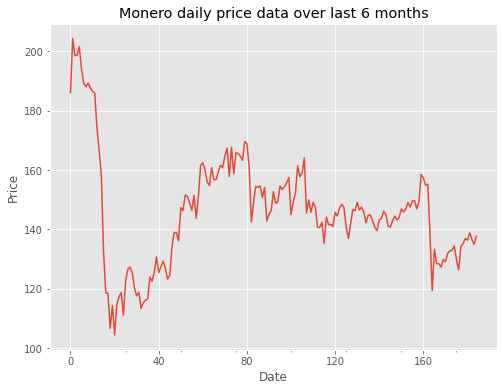

In [9]:
x , y = df.Date , df.Price

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)
# ax.tick_params(axis='x',rotation=90)

ax.xaxis.set_major_locator(MultipleLocator(40))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

ax.xaxis.set_minor_locator(MultipleLocator(25))

# plt.gca().invert_xaxis()

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monero daily price data over last 6 months')
plt.show()

In [10]:
figure = px.line(df, x = df.Date, 
                 y = df.Price, 
                 title = "Monero daily price (in USD) over last 6 months")

figure.show()

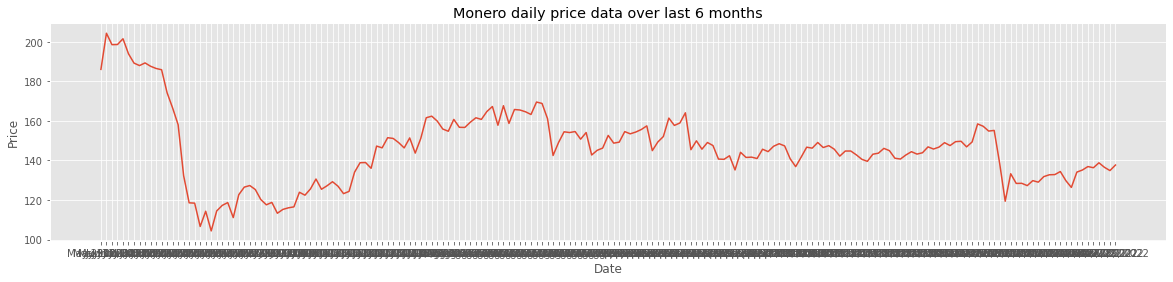

In [11]:
x , y = df.Date , df.Price
fig = plt.figure(figsize=(20,4))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monero daily price data over last 6 months')
plt.show()

#May 29 2022 - Nov 29 2022

Slope : -0.06252956104772364
Intercept : 151.81623312990405


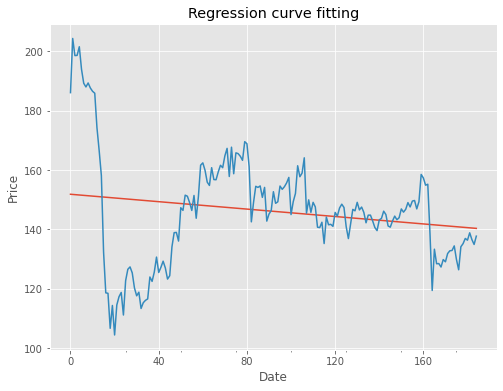

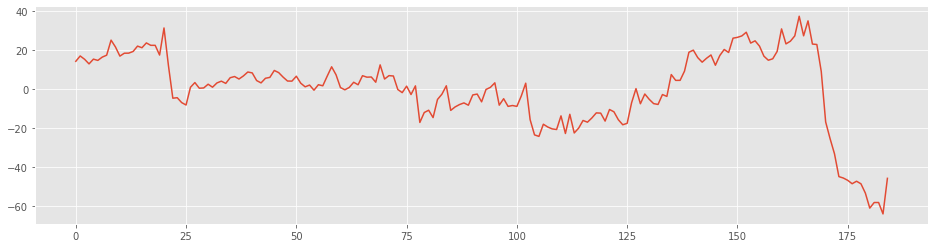

In [12]:
x = np.arange(df['Date'].size)
fit = np.polyfit(x, df['Price'], deg=1)
print ("Slope : " + str(fit[0]))
print ("Intercept : " + str(fit[1]))

#Fit function : y = mx + c [linear regression ]
fit_function = np.poly1d(fit)

# #Linear regression plot
# plt.plot(df['Date'], fit_function(x))
# #Time series data plot
# plt.plot(df['Date'], df['Price'])

fig, ax = plt.subplots(figsize=(8, 6))
# ax.plot(x, y)

ax.xaxis.set_major_locator(MultipleLocator(40))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

ax.xaxis.set_minor_locator(MultipleLocator(25))


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Regression curve fitting')
plt.figure(figsize=(16,4))
ax.plot(df['Date'], fit_function(x))
ax.plot(df['Date'], df['Price'])

detrended = [fit_function(x)[i] - df['Price'][i] for i in range(0, len(series))]
# plot detrended
plt.plot(detrended)
plt.show()

# ax.show()
# plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     6.148
Date:                Thu, 08 Dec 2022   Prob (F-statistic):             0.0141
Time:                        08:40:40   Log-Likelihood:                -799.46
No. Observations:                 185   AIC:                             1603.
Df Residuals:                     183   BIC:                             1609.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.8162      2.683     56.590      0.0

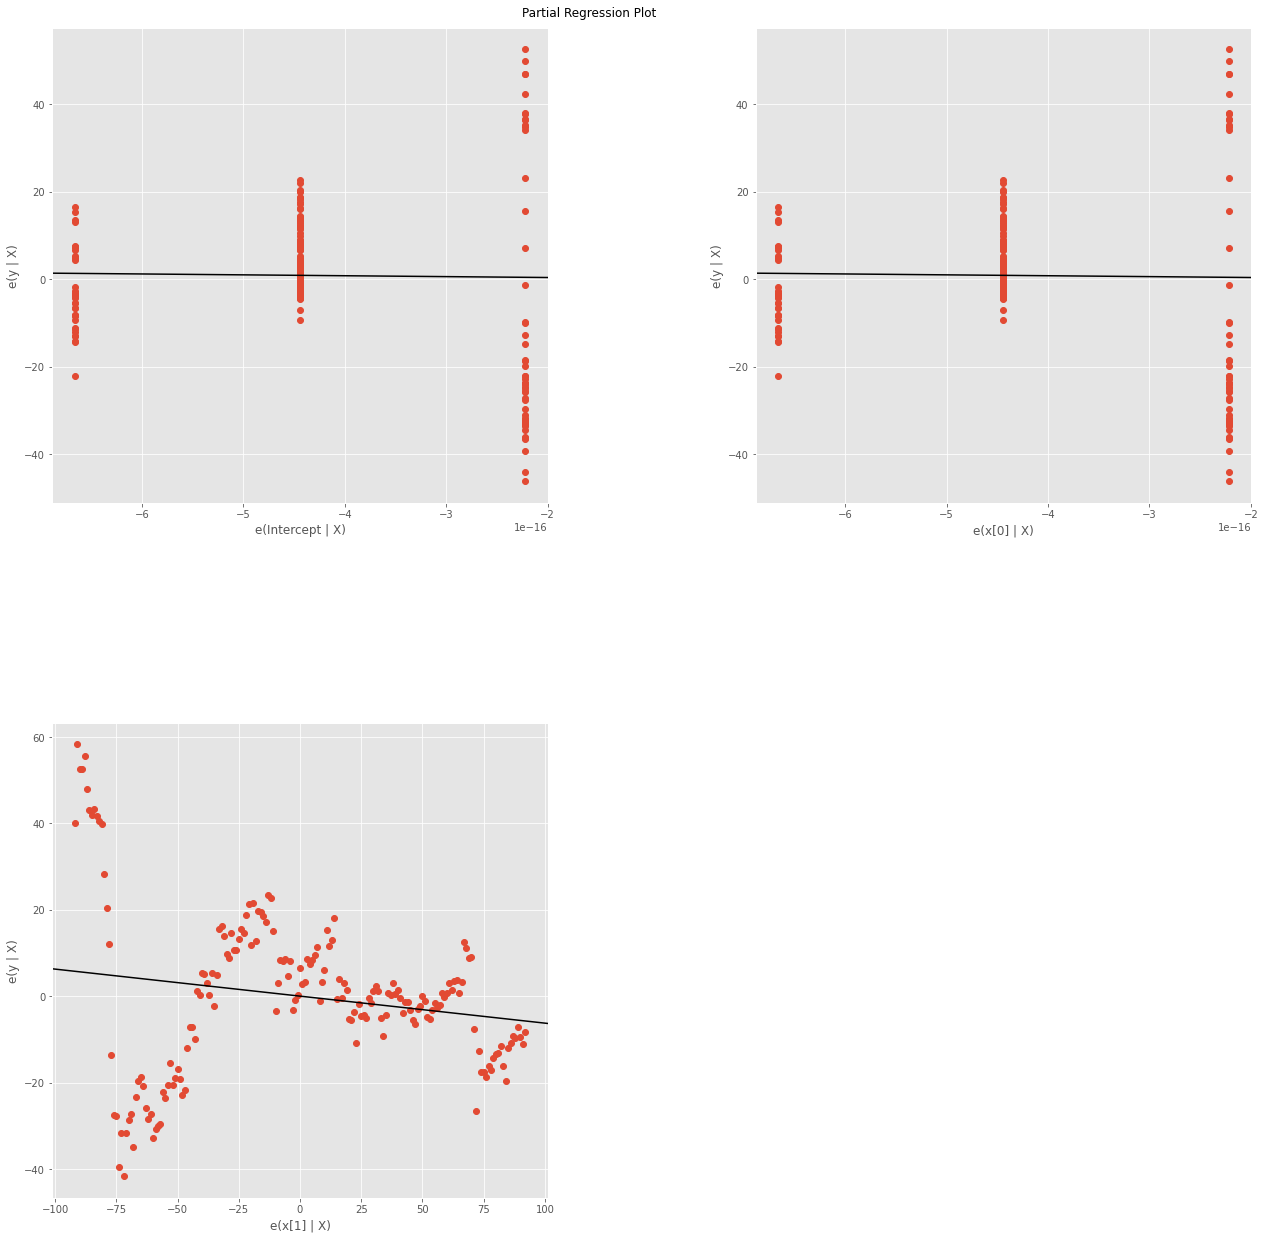

In [13]:
import statsmodels.api as sm
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
# adding the constant term
x = sm.add_constant(x)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

fig = sm.graphics.plot_partregress_grid(ols('y~x', data=df).fit())
fig.tight_layout(pad=1.0)
fig.set_size_inches(20, 20)




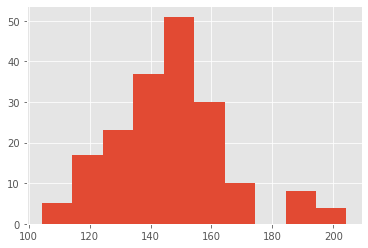

In [14]:
df['Price'].hist()
plt.show()

In [15]:
fig = px.histogram(df['Price'], x = 'Price', width=800, height=400)
fig.show()

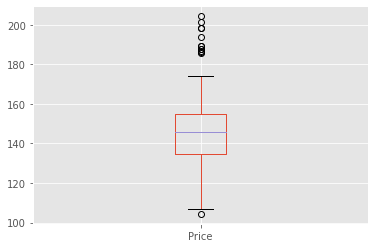

In [16]:
df.boxplot('Price')

In [17]:
print(statistics.variance(df['Price']))
print(statistics.stdev(df['Price']))
print(statistics.mean(df['Price']))

344.95999528378377
18.573098699026605
146.0635135135135


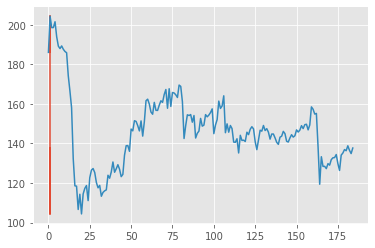

In [18]:
df = df.clip(lower=df.quantile(0.05), upper=df.quantile(0.95), axis=1)
plt.plot(x, y)


In [19]:
fig = px.histogram(df['Price'], x = 'Price', width=800, height=400)
fig.show()

In [20]:
X = df['Price']
result = adfuller(X)
print(result)

(-2.805521745759339, 0.057489344618906126, 0, 184, {'1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586}, 1056.3269507200375)


In [21]:
X = df['Price']
split = len(X) / 2
n_split = round(split)
X1, X2 = X[0:n_split], X[n_split:]

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=148.037076, mean2=143.796022
variance1=508.535460, variance2=71.974448


In [22]:
print(statistics.variance(df['Price']))
print(statistics.stdev(df['Price']))
print(statistics.mean(df['Price']))

292.0121162511751
17.088362011941786
145.90508648648648


In [23]:
fig = px.histogram(df['Price'], x = 'Price', width=800, height=400)
fig.show()

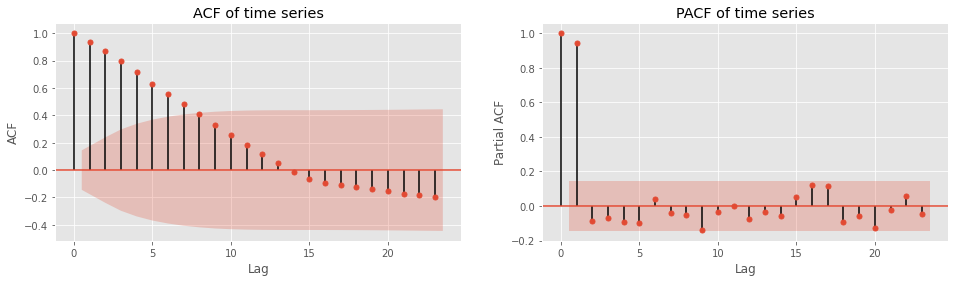

In [24]:
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1,2,1)
plot_acf(y, title='ACF of time series',ax=ax1 )
plt.xlabel('Lag')
plt.ylabel('ACF')
ax2 = plt.subplot(1,2,2)
plot_pacf(y, title='PACF of time series',ax=ax2)
plt.xlabel('Lag')
plt.ylabel('Partial ACF')
plt.show()

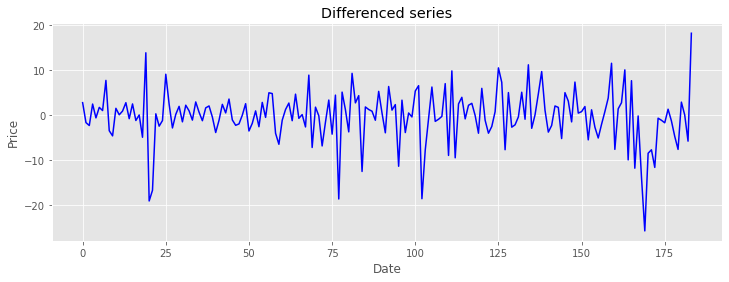

In [25]:
fig = plt.figure(figsize=(12,4))
plt.plot(diff(y),color='b');
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Differenced series')
plt.show()

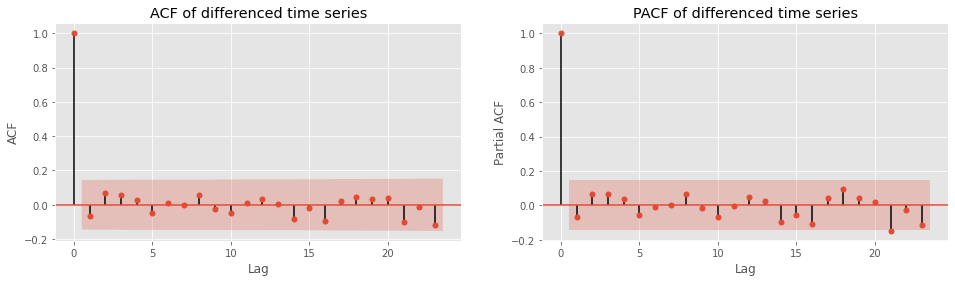

In [26]:
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1,2,1)
plot_acf(diff(y), title='ACF of differenced time series',ax=ax1 )
plt.xlabel('Lag')
plt.ylabel('ACF')
ax2 = plt.subplot(1,2,2)
plot_pacf(diff(y), title='PACF of differenced time series',ax=ax2)
plt.xlabel('Lag')
plt.ylabel('Partial ACF')
plt.show()

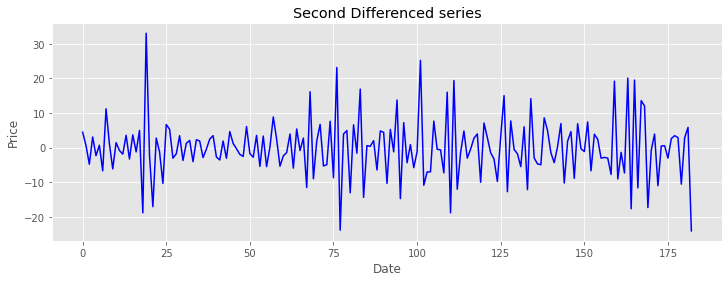

In [27]:
fig = plt.figure(figsize=(12,4))
plt.plot(diff(diff(y)),color='b');
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Second Differenced series')
plt.show()

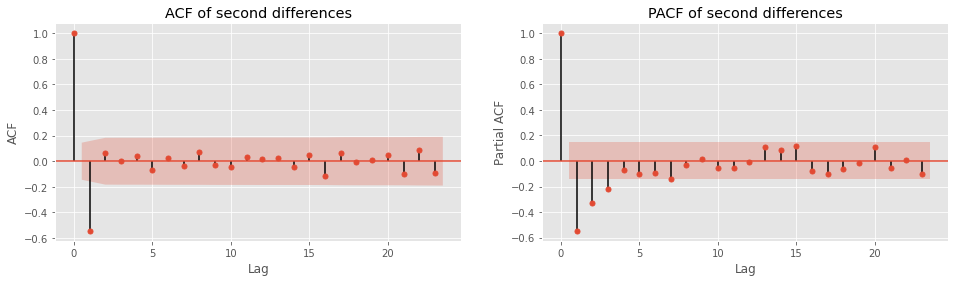

In [28]:
plt.figure(figsize=(16,4))
ax1 = plt.subplot(1,2,1)
plot_acf(diff(diff(y)), title='ACF of second differences',ax=ax1 )
plt.xlabel('Lag')
plt.ylabel('ACF')
ax2 = plt.subplot(1,2,2)
plot_pacf(diff(diff(y)), title='PACF of second differences',ax=ax2)
plt.xlabel('Lag')
plt.ylabel('Partial ACF')
plt.show()

In [29]:
X1 = diff(y)
result1 = adfuller(X1)

print(result1)
print('ADF Test Statistic: %f' % result1[0])
print('P-Value: %f' % result1[1])

(-14.7560967817194, 2.4425943870905987e-27, 0, 183, {'1%': -3.466598080268425, '5%': -2.8774669520682674, '10%': -2.5752604356654425}, 1054.2478881067302)
ADF Test Statistic: -14.756097
P-Value: 0.000000


In [30]:
print(statistics.variance(X1))
print(statistics.stdev(X1))
print(statistics.mean(X1))

35.03836644939416
5.919321451770816
-0.26290217391304344


In [31]:
#ARIMA (3, 2, 1)

from statsmodels.tsa.arima_model import ARIMA

model1 = ARIMA(y, order=(3,2,1))
model1_fit = model1.fit(disp=0)
print(model1_fit.summary())

residuals = pd.DataFrame(model1_fit.resid)

model1_sse = sum((residuals**2).values)
model1_aic = model1_fit.aic

print(model1_fit.aic)
print(model1_fit.bic)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                             ARIMA Model Results                              
Dep. Variable:               D2.Price   No. Observations:                  183
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -586.176
Method:                       css-mle   S.D. of innovations              5.873
Date:                Thu, 08 Dec 2022   AIC                           1184.352
Time:                        08:40:42   BIC                           1203.608
Sample:                             2   HQIC                          1192.157
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0054      0.009      0.615      0.539      -0.012       0.023
ar.L1.D2.Price    -0.0672      0.076     -0.885      0.376      -0.216       0.082
ar.L2.D2.Price     0.0782      0.076

In [32]:
model2 = ARIMA(y, order=(1,0,7))
model2_fit = model2.fit(disp=0)
print(model2_fit.summary())

residuals = pd.DataFrame(model2_fit.resid)

model2_sse = sum((residuals**2).values)
model2_aic = model2_fit.aic

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  185
Model:                     ARMA(1, 7)   Log Likelihood                -587.769
Method:                       css-mle   S.D. of innovations              5.763
Date:                Thu, 08 Dec 2022   AIC                           1195.537
Time:                        08:40:44   BIC                           1227.741
Sample:                             0   HQIC                          1208.588
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         147.7895      6.998     21.118      0.000     134.073     161.506
ar.L1.Price     0.9220      0.042     21.993      0.000       0.840       1.004
ma.L1.Price    -0.0203      0.086     -0.234    

In [33]:
model3 = ARIMA(y, order=(1,0,8))
model3_fit = model3.fit(disp=0)
print(model3_fit.summary())

residuals = pd.DataFrame(model3_fit.resid)

model3_sse = sum((residuals**2).values)
model3_aic = model3_fit.aic

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                              ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  185
Model:                     ARMA(1, 8)   Log Likelihood                -586.612
Method:                       css-mle   S.D. of innovations              5.725
Date:                Thu, 08 Dec 2022   AIC                           1195.223
Time:                        08:40:46   BIC                           1230.647
Sample:                             0   HQIC                          1209.580
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         147.5929      6.558     22.506      0.000     134.739     160.446
ar.L1.Price     0.9021      0.051     17.753      0.000       0.802       1.002
ma.L1.Price     0.0060      0.089      0.068    

In [34]:
model4 = ARIMA(y, order=(3,1,1))
model4_fit = model4.fit(disp=0)
print(model4_fit.summary())

residuals = pd.DataFrame(model4_fit.resid)

model4_sse = sum((residuals**2).values)
model4_aic = model4_fit.aic

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  184
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -586.490
Method:                       css-mle   S.D. of innovations              5.862
Date:                Thu, 08 Dec 2022   AIC                           1184.981
Time:                        08:40:47   BIC                           1204.270
Sample:                             1   HQIC                          1192.799
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2587      0.472     -0.548      0.584      -1.185       0.667
ar.L1.D.Price     0.1075      0.663      0.162      0.871      -1.193       1.408
ar.L2.D.Price     0.0868      0.087     

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




In [35]:
models = []

for i in range(10):
  # for j in range(2):
  #   for k in range(2):
      m = ARIMA(y, order=(i, 0, 0))
      m_fit = m.fit(disp = 0)
      models.append(((i, 0, 0), m_fit.aic, m_fit.bic))


# print(models)


# model5 = ARIMA(y, order=(1,1,1))
# model5_fit = model5.fit(disp=0)
# print(model5_fit.summary())

# residuals = pd.DataFrame(model5_fit.resid)

# model5_sse = sum((residuals**2).values)
# model5_aic = model5_fit.aic

models

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




[((0, 0, 0), 1609.0388089065293, 1615.4795205566859),
 ((1, 0, 0), 1187.0435521695772, 1196.7046196448123),
 ((2, 0, 0), 1188.8265650754372, 1201.7079883757506),
 ((3, 0, 0), 1188.8884630016855, 1204.9902421270772),
 ((4, 0, 0), 1188.956717445093, 1208.278852395563),
 ((5, 0, 0), 1189.8282778623297, 1212.370768637878),
 ((6, 0, 0), 1191.8073110846715, 1217.570157685298),
 ((7, 0, 0), 1193.5606387048283, 1222.543841130533),
 ((8, 0, 0), 1195.1704231979015, 1227.3739814486848),
 ((9, 0, 0), 1194.749378812783, 1230.1732928886447)]

In [36]:
# models = []

# for i in range(10):
#   # for j in range(2):
#     # for k in range(2):
#       m = ARIMA(y, order=(i, 1, 0))
#       m_fit = m.fit(disp = 0)
#       models.append(((i, 1, 0), m_fit.aic, m_fit.bic))


# print(models)

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  184
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -587.776
Method:                           css   S.D. of innovations              5.903
Date:                Thu, 08 Dec 2022   AIC                           1179.552
Time:                        08:40:52   BIC                           1185.982
Sample:                             1   HQIC                          1182.158
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2629      0.435     -0.604      0.546      -1.116       0.590


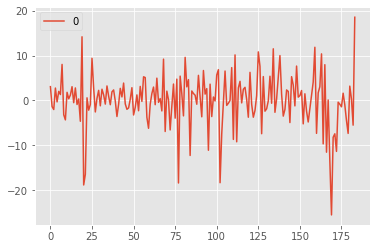

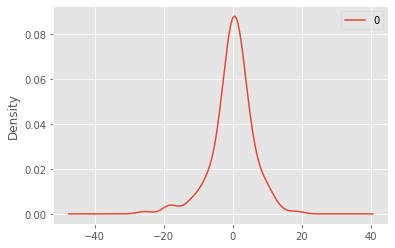

                  0
count  1.840000e+02
mean   1.737740e-16
std    5.919321e+00
min   -2.550710e+01
25%   -2.255848e+00
50%    3.364022e-01
75%    2.932652e+00
max    1.853090e+01


In [37]:
model = ARIMA(y, order=(0,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = pd.DataFrame(model_fit.resid)

model_sse = sum((residuals**2).values)
model_aic = model4_fit.aic

residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

In [38]:
results_df = pd.DataFrame({
    'Arima(3,2,1)': [model1_aic, "{:.3f}".format(model1_fit.bic)], 
    'Arima(1,0,7)': [model2_aic, "{:.3f}".format(model2_fit.bic)],
    'Arima(1,0,8)': [model3_aic, "{:.3f}".format(model3_fit.bic)],
    'Arima(3,1,1)': [model4_aic, "{:.3f}".format(model4_fit.bic)]
}, index=['AIC', 'BIC'])

results_df.head()

,"Arima(3,2,1)","Arima(1,0,7)","Arima(1,0,8)","Arima(3,1,1)"
AIC,1184.351568,1195.537053,1195.223261,1184.980855
BIC,1203.608,1227.741,1230.647,1204.270


In [39]:
df_comp = df.copy()
df_comp.head()

,Date,Price,Open,High,Low,Vol.,Change %
184,NaN,186.0690,176.0920,188.2290,167.9440,NaN,NaN
183,NaN,186.4386,186.0690,189.8362,181.8608,NaN,NaN
182,NaN,186.4386,186.4386,189.8362,181.8608,NaN,NaN
181,NaN,186.4386,186.4386,189.8362,181.8608,NaN,NaN
180,NaN,186.4386,186.4386,189.8362,181.8608,NaN,NaN
